In [0]:
import re
import pandas as pd

In [61]:
# clean the lyrics
# require lyrics.csv
# remove all nan rows and strange characters in lyrics colounm
# return clean df
def clean_lyrics():
  usecols = ['year','genre','lyrics']
  song = pd.read_csv("/content/drive/My Drive/NLP/W4/lyrics.csv",usecols=usecols)
  song=song[song.year>1000]
  clean_song=song.dropna(subset=['lyrics']).replace({'lyrics': '[^A-Za-z ]',} ,' ', regex=True)
  #clean_song = song.replace({'lyrics': '[^A-Za-z ]',} ,' ', regex=True)
  clean_song['lyrics'] = clean_song['lyrics'].str.upper().str.split()
  #clean_song['lyrics'] = clean_song['lyrics'].str.split()
  return clean_song
song=clean_lyrics()
song


,year,genre,lyrics
0,2009,Pop,"[OH, BABY, HOW, YOU, DOING, YOU, KNOW, I, M, G..."
1,2009,Pop,"[PLAYIN, EVERYTHING, SO, EASY, IT, S, LIKE, YO..."
2,2009,Pop,"[IF, YOU, SEARCH, FOR, TENDERNESS, IT, ISN, T,..."
3,2009,Pop,"[OH, OH, OH, I, OH, OH, OH, I, VERSE, IF, I, W..."
4,2009,Pop,"[PARTY, THE, PEOPLE, THE, PEOPLE, THE, PARTY, ..."
...,...,...,...
362232,2012,Country,"[I, GOTTA, SAY, BOY, AFTER, ONLY, JUST, A, COU..."
362233,2012,Country,"[I, HELPED, YOU, FIND, HER, DIAMOND, RING, YOU..."
362234,2012,Country,"[LOOK, AT, THE, COUPLE, IN, THE, CORNER, BOOTH..."
362235,2012,Country,"[WHEN, I, FLY, OFF, THIS, MORTAL, EARTH, AND, ..."


In [0]:
# create 2 list of word one pos one neg
# this function is require for inquireraugmented.xls
# more info search Harvard IV-4
def creat_dic():
  dic=pd.read_excel("/content/drive/My Drive/NLP/W4/inquireraugmented.xls",encoding='utf-8')
  dic=dic.loc[:,['Entry','Positiv','Negativ']]#select necessry coloumn
  dic1=dic.dropna(thresh=2)#remove rows are no emotion
  dic1=dic1.dropna(subset=['Entry']).replace({'Entry': '[^A-Za-z]',} ,'', regex=True)#remove entry value nan
  #dic1.replace({'Entry': '[^A-Za-z]',} ,'', regex=True)
  pos_dic=dic1[dic1.Positiv == 'Positiv']
  #neg_dic=dic1[dic1.Negativ == 'Negativ']
  Pos_list =dic1[dic1.Positiv == 'Positiv']['Entry'].tolist()
  Neg_list =dic1[dic1.Negativ == 'Negativ']['Entry'].tolist()
  #for rows in pos_dic.itertuples(): 
    #Pos_list.append(re.sub(r'[^A-Z]*', '', rows.Entry)) #remove character
  #for rows in neg_dic.itertuples(): 
    #Neg_list.append(re.sub(r'[^A-Z]*', '', str(rows.Entry))) #unknow why we have no string in this
  return [Pos_list, Neg_list]
pos,neg=creat_dic()
 
##may try to use oop method
# performace improved

In [62]:
#function sentiment_scorer
#Uses user-supplied list to gauge sentiment on an
#arbitrary piece of text.
##inputs:
#data frame include lyrics
#with a sentiment (e.g., negative)
#output:
#data frame include avg score
from collections import Counter  #引入Counter包

def sentiment_scorer(song):
  pos,neg=creat_dic()
  song["avg"] = song["lyrics"].apply(lambda x :count_pos(x))
  #song["cn"] = song["lyrics"].apply(count_neg)
  #song['avg'] = song[['cp', 'cn']].mean(axis=1)
  return song
song=sentiment_scorer(song)
song

,year,genre,lyrics,avg
0,2009,Pop,"[OH, BABY, HOW, YOU, DOING, YOU, KNOW, I, M, G...",18
1,2009,Pop,"[PLAYIN, EVERYTHING, SO, EASY, IT, S, LIKE, YO...",9
2,2009,Pop,"[IF, YOU, SEARCH, FOR, TENDERNESS, IT, ISN, T,...",6
3,2009,Pop,"[OH, OH, OH, I, OH, OH, OH, I, VERSE, IF, I, W...",44
4,2009,Pop,"[PARTY, THE, PEOPLE, THE, PEOPLE, THE, PARTY, ...",4
...,...,...,...,...
362232,2012,Country,"[I, GOTTA, SAY, BOY, AFTER, ONLY, JUST, A, COU...",4
362233,2012,Country,"[I, HELPED, YOU, FIND, HER, DIAMOND, RING, YOU...",1
362234,2012,Country,"[LOOK, AT, THE, COUPLE, IN, THE, CORNER, BOOTH...",3
362235,2012,Country,"[WHEN, I, FLY, OFF, THIS, MORTAL, EARTH, AND, ...",18


In [60]:
def count_pos(x):
  set_pos = set(x)&set(pos)
  
  set_neg = set(x)&set(neg)
  
  s=0
  for item in set_pos:
    s+=x.count(item)
  for item in set_neg:
    s-=x.count(item)
  return s


-1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

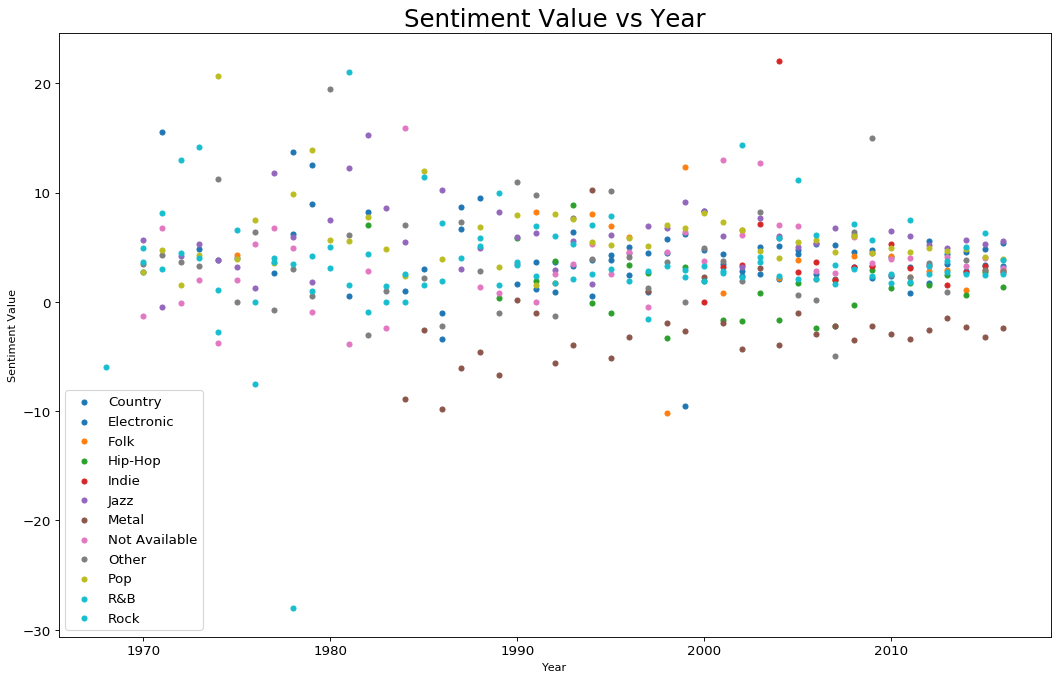

In [95]:
acc = song.groupby(["year", "genre"], as_index=False)['avg'].mean()

import numpy as np

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(acc['genre'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('year', "avg",data=acc.loc[acc.genre==category, :],  s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Year', ylabel='Sentiment Value')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Sentiment Value vs Year", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

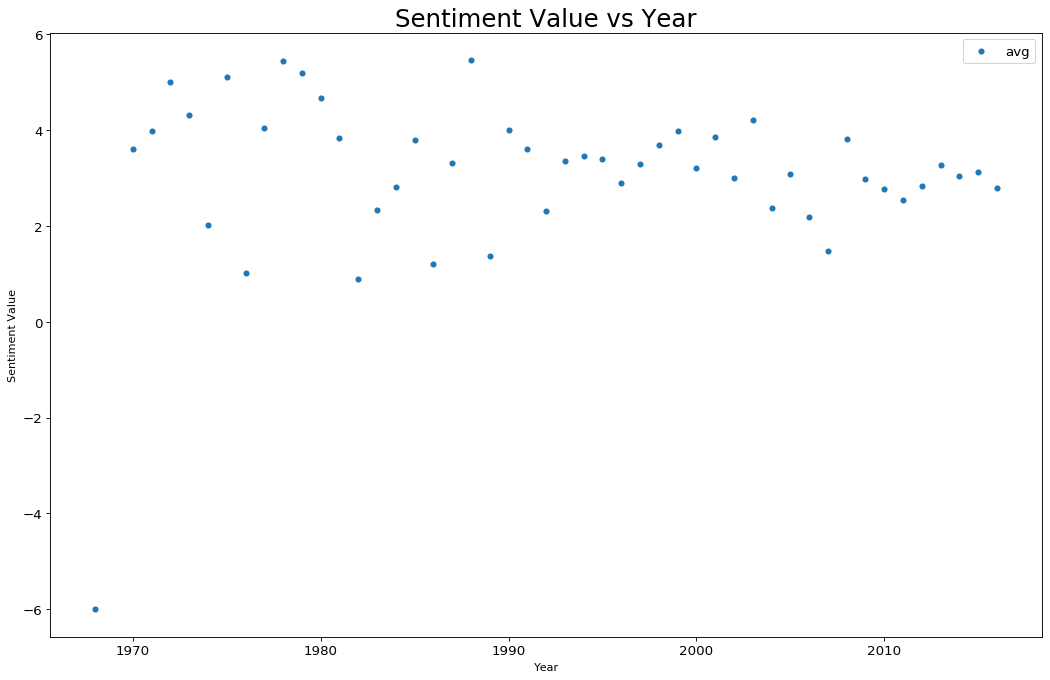

In [96]:
acc = song.groupby(["year"], as_index=False)['avg'].mean()

import numpy as np

# Prepare Data 
# Create as many colors as there are unique midwest['category']


# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')


plt.scatter('year', "avg",data=acc,  s=20)

# Decorations
plt.gca().set(xlabel='Year', ylabel='Sentiment Value')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Sentiment Value vs Year", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    